<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Example Codes for Fast Fourier Transforms
===================================================

### Instructions: If you're running this notebook in Google Colab

As of Feb 16th, 2022, the version of scipy in Google Colab is old, and some of the routines used in this notebook are absent. **Please run the code cell below** before any of the other code cells so that scipy can be upgraded to the latest version in the active Colab runtime. Do not forget to click "RESTART RUNTIME" once scipy has upgraded. 

If you're running the notebook locally on your device, then this should not be necessary unless your version if scipy is outdated as well.

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20
!pip3 install --upgrade scipy

**Introduction:**

#### The Problem:

Generate two time-dependent signals:
 1. A sine wave of freauency $100$.
 2. A superposition of sine waves of different amplitudes (say, $1$ and $0.3$) and different  frequencies (say $100$ and $70$ respectively).
 
Choose a sampling rate (say $1000$) and build a time vector of signal data by sampling the signals at that rate. Evaluate the Fast Fourier Transform of both signals and plot the absolute values as functions of frequency.



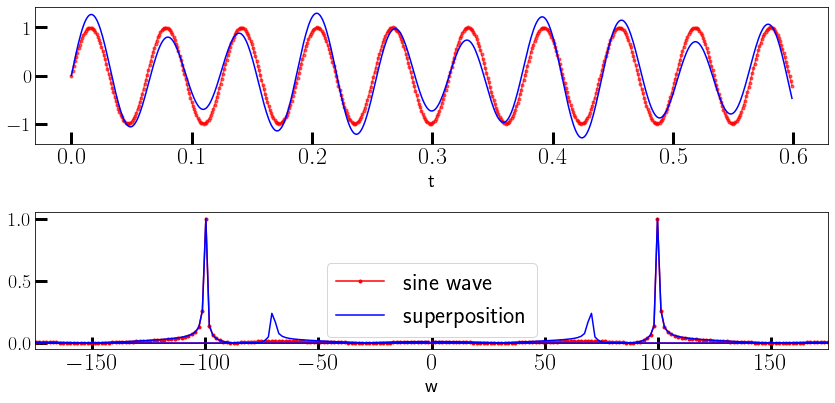

In [58]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 20

sample_rate = 1000

Delta = 1/sample_rate
sample_size = 4000
t = np.arange(sample_size) * Delta
padded_size = 2**np.ceil(np.log2(sample_size)).astype(int)

s1 = np.sin(100*t)
s2 = s1 + 0.3 * np.sin(70*t)

sp1 = np.fft.fft(s1, n=padded_size)
sp2 = np.fft.fft(s2, n=padded_size)

freq = np.fft.fftfreq(padded_size, d=t[1]-t[0])
f, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(t[0:600], s1[0:600], "r.-", label='sine wave', alpha=0.6)
ax1.plot(t[0:600], s2[0:600], "b", label='superposition')
ax1.set_xlabel('t')

ax2.plot(2*np.pi*freq, np.abs(sp1)/np.amax(np.abs(sp1)), "r.-", label='sine wave')
ax2.plot(2*np.pi*freq, np.abs(sp2)/np.amax(np.abs(sp2)), "b", label='superposition')
ax2.legend()
ax2.set_xlabel('w')
ax2.set_xlim(-175,175)
plt.show()

#### The Problem:
Load the following signal data into numpy arrays:

 1. [fftdata/times.npy](fftdata/times.npy)
 2. [fftdata/signal.npy](fftdata/signal.npy)
 3. [fftdata/noisy_signal.npy](fftdata/noisy_signal.npy)

Plot the signal and noisy signal data as functions of time, as well as their FFTs as functions of frequency. 

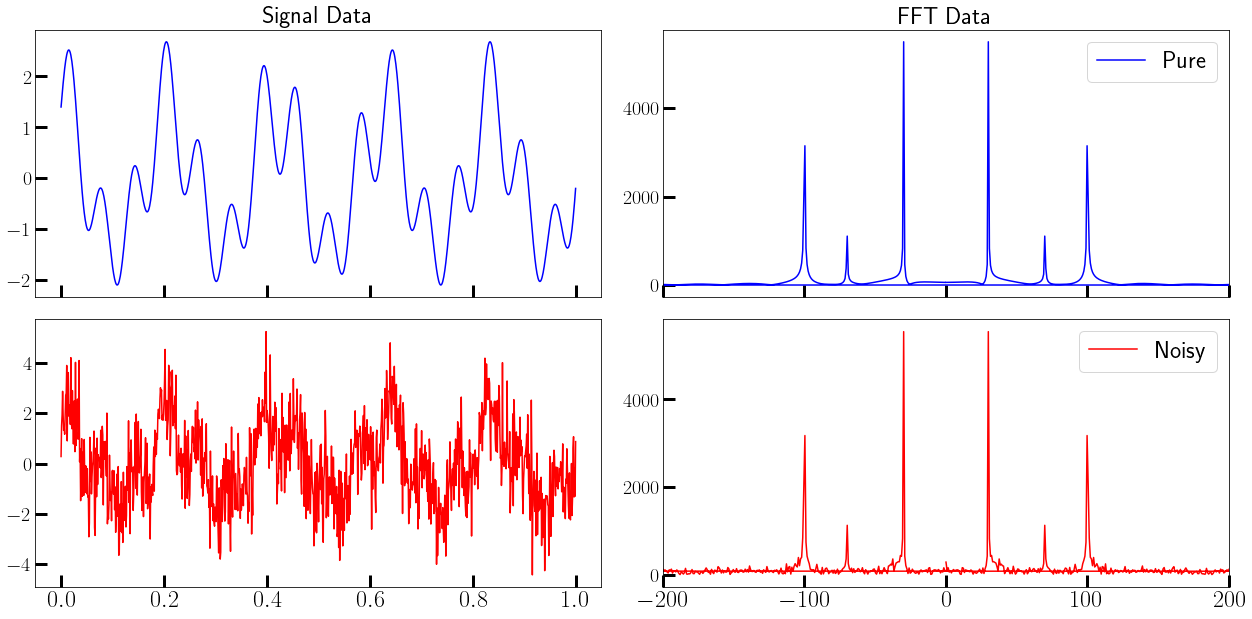

In [110]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18,9)
plt.rcParams['font.size'] = 20

# Load the datasets from files
times = np.load('fftdata/times.npy')
signal = np.load('fftdata/signal.npy')
noisy_signal = np.load('fftdata/noisy_signal.npy')

# Create a 2X2 grid of axes
f, axs = plt.subplots(2,2, sharex='col')

#Plot the raw datasets on the first column axes
axs[0,0].plot(times[0:1000], signal[0:1000], color="blue")
axs[0,0].set_title("Signal Data")
axs[1,0].plot(times[0:1000], noisy_signal[0:1000],color="red")

# Do the FFT of the datasets
sample_size = times.shape[-1]
padded_size = 2**np.ceil(np.log2(sample_size)).astype(int)
ft_sig = np.fft.fft(signal, n=padded_size)
ft_noisy = np.fft.fft(noisy_signal, n=padded_size)
freq = np.fft.fftfreq(padded_size, d=t[1]-t[0])

#Plot the fft datasets on the corresponding rows of the last column
axs[0,1].plot(2*np.pi*freq, np.abs(ft_sig), color='blue', label='Pure')
axs[0,1].set_title("FFT Data")
axs[1,1].plot(2*np.pi*freq, np.abs(ft_noisy), color='red', label='Noisy')
for ax in axs[:,1]:
    ax.set_xlim(-200,200)
    ax.legend()

plt.legend()
plt.show()

Clean up the FFT data of the noisy signal by removing the ‘noisy frequencies’. An easy way to do this is by ‘masking’ the bad data using the masking module in numpy, named ‘numpy.ma’. Finally, take an inverse FFT of the masked data and see if you succeeded in cleaning it up

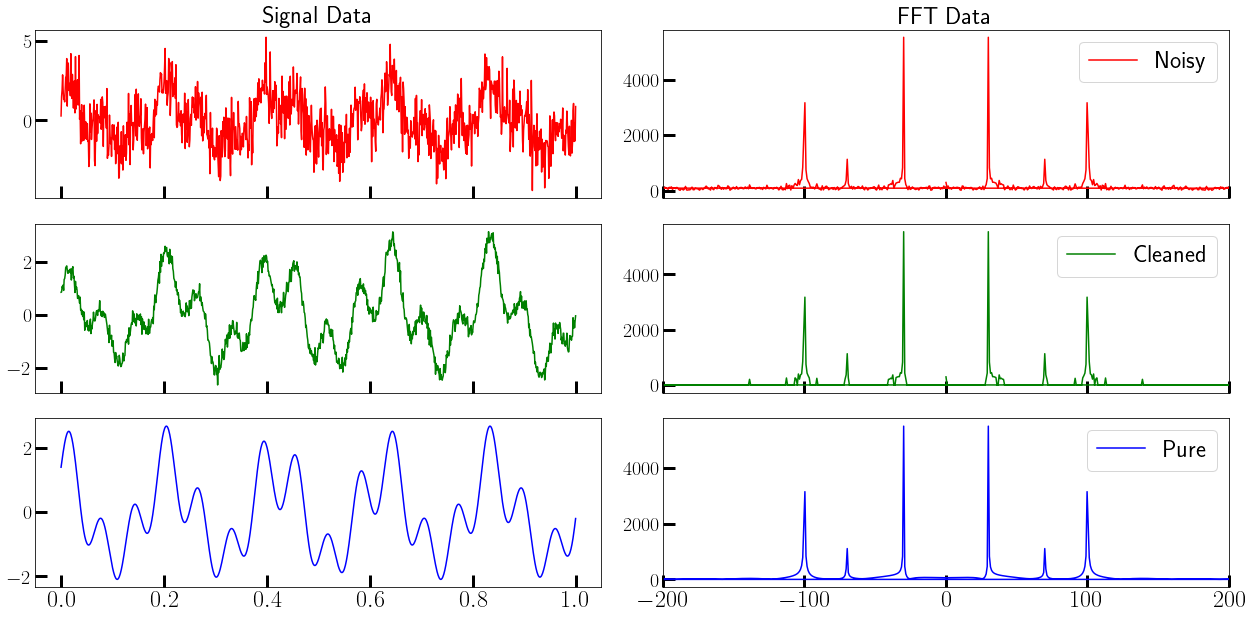

In [111]:
import numpy as np
import matplotlib.pyplot as plt

threshold = 200
ft_abs      = np.abs(ft_noisy) 
indices     = ft_abs > threshold   # filter out those value under 300
ft_clean    = indices * ft_noisy # noise frequency will be set to 0
cleaned_signal = np.fft.ifft(ft_clean) # Do inverse FFT

# Create a 2X2 grid of axes
f, axs = plt.subplots(3,2, sharex='col')

#Plot the raw datasets on the first column axes
axs[0,0].plot(times[0:1000], noisy_signal[0:1000], color='red')
axs[0,0].set_title("Signal Data")
axs[1,0].plot(times[0:1000], cleaned_signal[0:1000].real, color='green')
axs[2,0].plot(times[0:1000], signal[0:1000].real, color='blue')

#Plot the fft datasets on the corresponding rows of the last column
axs[0,1].plot(2*np.pi*freq, np.abs(ft_noisy), color='red', label='Noisy')
axs[0,1].set_title("FFT Data")
axs[1,1].plot(2*np.pi*freq, np.abs(ft_clean), color='green', label='Cleaned')
axs[2,1].plot(2*np.pi*freq, np.abs(ft_sig), color='blue', label='Pure')
for ax in axs[:,1]:
    ax.set_xlim(-200,200)
    ax.legend()

plt.show()

### Homework: 

Use a similar technique to separate the two frequencies in the cleaned data and plot them 
Independently.

**Comparing DFT with FFT**

### The Problem

Write (or find) a Python routine that:

 1. Takes a numpy array f as its argument. 
 2. Evaluates the DFT vector F  
 3. Evaluates the execution time.
 4. Returns both of the above.

In [131]:
import numpy as np

def dft(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    N = x.shape[-1]
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return e @ x

x = np.random.random(100)
print(np.allclose(dft(x), np.fft.fft(x)))

True


Generate random column vectors of sizes $16, 32, 64, 128, 256, 512,1024, 2048$, and $4096$. Run the above subroutine and plot the execution time as a function of data size. Interpret the curve. Repeat the steps above with the builtin FFT routine. Compare the plots.

### Suggestion:

Use log-scale for the times in the y-axis.

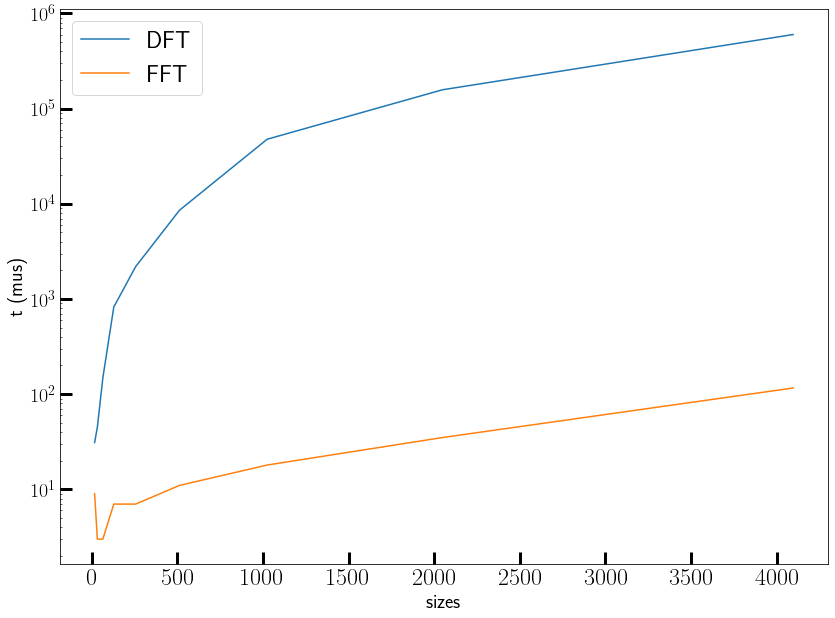

In [140]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 20

from timeit import Timer
defnum = 20

mysetup = 'import numpy as np\n'
mysetup += '''def dft(x):
                N = x.shape[-1]
                n = np.arange(N)
                k = n.reshape((N, 1))
                e = np.exp(-2j * np.pi * k * n / N)
                return e @ x'''

sizes = 2**np.arange(4,13)
times_dft = np.zeros_like(sizes)
times_fft = np.zeros_like(sizes)
for i,s in enumerate(sizes):
    dft = Timer(setup=mysetup, stmt="dft(np.random.random(%d))" % (s,))
    times_dft[i] = min(dft.repeat(number=defnum)) * 1e6 / defnum
    fft = Timer(setup=mysetup, stmt="np.fft.fft(np.random.random(%d))" % (s,))
    times_fft[i] = min(fft.repeat(number=defnum)) * 1e6 / defnum

plt.plot(sizes, times_dft,label="DFT")
plt.plot(sizes, times_fft, label="FFT")
plt.xlabel("sizes")
plt.ylabel("t (mus)")
plt.yscale('log')
plt.legend()
plt.show()

### Homework:

 1. Plot the execution time for the DFT case as a function of $N^2$, where $N$ is the vector size.
 2. Plot the execution time for the FFT case as a function of $N\log_2{N}$.
 3. What can you infer from these graphs?
 4. Generate two vectors of random numbers and equal size (choose a large size), and evaluate the sum of all possible products of two elements, one from each 
    vector. You can do this by obtaining the outer product of these two vectors and sum over all elements 
    Now, get the FFTs of the two vectors, compute their element-wise product, and do the IFFT of the result. Sum over this. Is the sum equal to the 
    previous result? Why? **Hint:** Recall the convolution theorem from the theory of Fourier Transforms. 
 5. Use the %timeit magic to determine which of the two methods obtained in the previous problem is faster.
 
